<h1><font color=blue><fontsize: 45pt><center>Analysis of Travel Demand</center></h1>

**Summary:**

This notebook will analyse the dataset and use the demand data for a particular location in one day. With the data, I will use 2 exisiting models from Scikit-learn to see if I can predict the demand further.

The 2 models are:
1. Random Forrest Regressor
2. Decision Tree Regressor

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

import Geohash
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import math

In [2]:
# Essential FUnctions

def gh_decode(hash):
    lat, lon = Geohash.decode(hash)
    return pd.Series({"latitude":lat, "longitude":lon})

%matplotlib inline

def RandomForestRegressor_Model(x_train, y_train, X_test):
    RFR_model = RandomForestRegressor(n_estimators = 100, criterion = "mae", n_jobs = -1)
    a = RFR_model.fit(x_train, y_train)
    print(a, "\n")
    predicted_train_set_RFR = RFR_model.predict(x_train)
    
    print("Mean Absolute Error     :", mean_absolute_error(y_train, predicted_train_set_RFR))
    print("Mean Squared Error      :", mean_squared_error(y_train, predicted_train_set_RFR))
    print("Root Mean Squared Error :", math.sqrt(mean_squared_error(y_train, predicted_train_set_RFR)))
    
    y_test_predictions_RFR = RFR_model.predict(X_test)
    test_set_predictions_RFR = {'time_in_mins': X_test['time_in_mins'], 'demand': y_test_predictions_RFR}
    predicted_dataframe_RFR = pd.DataFrame(data = test_set_predictions_RFR)
    predicted_dataframe_RFR = predicted_dataframe_RFR[['time_in_mins','demand']]
    
    return predicted_dataframe_RFR

def RandomForestRegressor_Model_complete(x_train, X_test, y_train, y_test):
    RFR_model = RandomForestRegressor(n_estimators = 100, criterion = "mae", n_jobs = -1)
    a = RFR_model.fit(x_train, y_train)
    print(a, "\n")
    predicted_train_set_RFR = RFR_model.predict(x_train)
    
    y_test_predictions_RFR = RFR_model.predict(X_test)
    test_set_predictions_RFR = {'time_in_mins': X_test['time_in_mins'], 'demand': y_test_predictions_RFR}
    predicted_dataframe_RFR = pd.DataFrame(data = test_set_predictions_RFR)
    predicted_dataframe_RFR = predicted_dataframe_RFR[['time_in_mins','demand']]

    actual_test_set = X_test.join(y_test)
    subtract = pd.DataFrame(predicted_dataframe_RFR['demand'].sub(actual_test_set['demand'], axis = 0))
    difference = subtract.reset_index().drop(columns = 'index')
    
    print("Mean Absolute Error     :", mean_absolute_error(actual_test_set['demand'], predicted_dataframe_RFR['demand']))
    print("Mean Squared Error      :", mean_squared_error(actual_test_set['demand'], predicted_dataframe_RFR['demand']))
    print("Root Mean Squared Error :", math.sqrt(mean_squared_error(actual_test_set['demand'], predicted_dataframe_RFR['demand']
                                                                   )), "\n")
    print("Red denotes the Actual Test set while Green denotes the Predicted Test set.")
    f, axes = plt.subplots(1, 2, figsize=(24, 9))
    axes[0].scatter(predicted_dataframe_RFR['time_in_mins'], predicted_dataframe_RFR['demand'], color = "black")
    axes[0].set_xlabel("Predicted values of the Response Variable Timestamp in mins")
    axes[0].set_ylabel("Predicted values of the Response Variable Demand")
    axes[1].scatter(predicted_dataframe_RFR['time_in_mins'], predicted_dataframe_RFR['demand'], color = "green")
    axes[1].scatter(actual_test_set['time_in_mins'], actual_test_set['demand'], color = "red")
    axes[1].set_xlabel("True and Predicted values of the Response Variable Timestamp in mins")
    axes[1].set_ylabel("True and Predicted values of the Response Variable Demand")
    plt.show()
    return pd.DataFrame(predicted_dataframe_RFR)

def DecisionTreeRegressor_Model(x_train, y_train, X_test):
    DTR_Model = DecisionTreeRegressor(max_depth = 5)
    a = DTR_Model.fit(x_train, y_train)
    print(a, "\n")
    preds_train_set_DTR = DTR_Model.predict(x_train)
    
    print("Mean Absolute Error     :", mean_absolute_error(y_train, preds_train_set_DTR))
    print("Mean Squared Error      :", mean_squared_error(y_train, preds_train_set_DTR))
    print("Root Mean Squared Error :", math.sqrt(mean_squared_error(y_train, preds_train_set_DTR)))
    
    y_test_predictions_DTR = DTR_Model.predict(X_test)
    test_set_predictions_DTR = {'time_in_mins': X_test['time_in_mins'], 'demand': y_test_predictions_DTR}
    predicted_dataframe_DTR = pd.DataFrame(data = test_set_predictions_DTR)
    predicted_dataframe_DTR = predicted_dataframe_DTR[['time_in_mins','demand']]
    
    return predicted_dataframe_DTR

def DecisionTreeRegressor_Model_complete(x_train, x_test, y_train, y_test):
    DTR_Model = DecisionTreeRegressor(max_depth = 5)
    a = DTR_Model.fit(x_train, y_train)
    print(a, "\n")
    preds_train_set_DTR = DTR_Model.predict(x_train)
    
    y_test_predictions_DTR = DTR_Model.predict(x_test)
    test_set_predictions_DTR = {'time_in_mins': x_test['time_in_mins'], 'demand': y_test_predictions_DTR}
    predicted_dataframe_DTR = pd.DataFrame(data = test_set_predictions_DTR)
    predicted_dataframe_DTR = predicted_dataframe_DTR[['time_in_mins','demand']]
    
    actual_test_set = x_test.join(y_test)
    subtract = pd.DataFrame(predicted_dataframe_DTR['demand'].sub(actual_test_set['demand'], axis = 0))
    difference = subtract.reset_index().drop(columns = 'index')
    
    print("Mean Absolute Error     :", mean_absolute_error(actual_test_set['demand'], predicted_dataframe_DTR['demand']))
    print("Mean Squared Error      :", mean_squared_error(actual_test_set['demand'], predicted_dataframe_DTR['demand']))
    print("Root Mean Squared Error :", math.sqrt(mean_squared_error(actual_test_set['demand'], predicted_dataframe_DTR['demand']
                                                                   )), "\n")  
    print("Red denotes the Actual Test set while Green denotes the Predicted Test set.")
    f, axes = plt.subplots(1, 2, figsize=(24, 9))
    axes[0].scatter(predicted_dataframe_DTR['time_in_mins'], predicted_dataframe_DTR['demand'], color = "black")
    axes[0].set_xlabel("Predicted values of the Response Variable Timestamp in mins")
    axes[0].set_ylabel("Predicted values of the Response Variable Demand")
    axes[1].scatter(predicted_dataframe_DTR['time_in_mins'], predicted_dataframe_DTR['demand'], color = "green")
    axes[1].scatter(actual_test_set['time_in_mins'], actual_test_set['demand'], color = "red")
    axes[1].set_xlabel("True and Predicted values of the Response Variable Timestamp in mins")
    axes[1].set_ylabel("True and Predicted values of the Response Variable Demand")
    plt.show()
    return pd.DataFrame(predicted_dataframe_DTR)

### Importing the Original Dataset

In [3]:
print("The Original dataset:")
traffic_data = pd.read_csv('Traffic Management/training.csv')
traffic_data.head()

The Original dataset:


,geohash6,day,timestamp,demand
0,qp03wc,18,20:0,0.020072
1,qp03pn,10,14:30,0.024721
2,qp09sw,9,6:15,0.102821
3,qp0991,32,5:0,0.088755
4,qp090q,15,4:0,0.074468


### Sorting of Dataset

In [4]:
traffic_data_sortdayNtime = pd.DataFrame(traffic_data)
traffic_data_sortdayNtime = traffic_data_sortdayNtime.sort_values(['day', 'timestamp'], ascending = True)
data_sortByDd = traffic_data_sortdayNtime.sort_values(['demand'], ascending = False)
print("The dataset arranged in descending order of demand, but sorted in date and time:")

data_sortByDd['hour'] = pd.to_datetime(data_sortByDd['timestamp'], format='%H:%M').dt.hour
data_sortByDd["time_in_mins"] = data_sortByDd["timestamp"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

data_sortByDd.head()

The dataset arranged in descending order of demand, but sorted in date and time:


,geohash6,day,timestamp,demand,hour,time_in_mins
788610,qp09d9,13,8:45,1.0,8,525
1380222,qp096q,56,11:0,1.0,11,660
1364029,qp096v,56,11:0,1.0,11,660
2221855,qp09e5,54,7:15,1.0,7,435
1005934,qp096x,39,4:15,1.0,4,255


### Analysis of a specific day - Day 20

In [5]:
data_10 = data_sortByDd.loc[(data_sortByDd['demand'] > 0.9) & (data_sortByDd['demand'] <= 1)]
day_20 = data_sortByDd.loc[(data_sortByDd['day'] == 20)]

Scatter plot of the demand against the time of the day.
1. First plot denotes all the demand that ranges from 0.9 to 1
2. Second plot denotes all the demand on Day 20

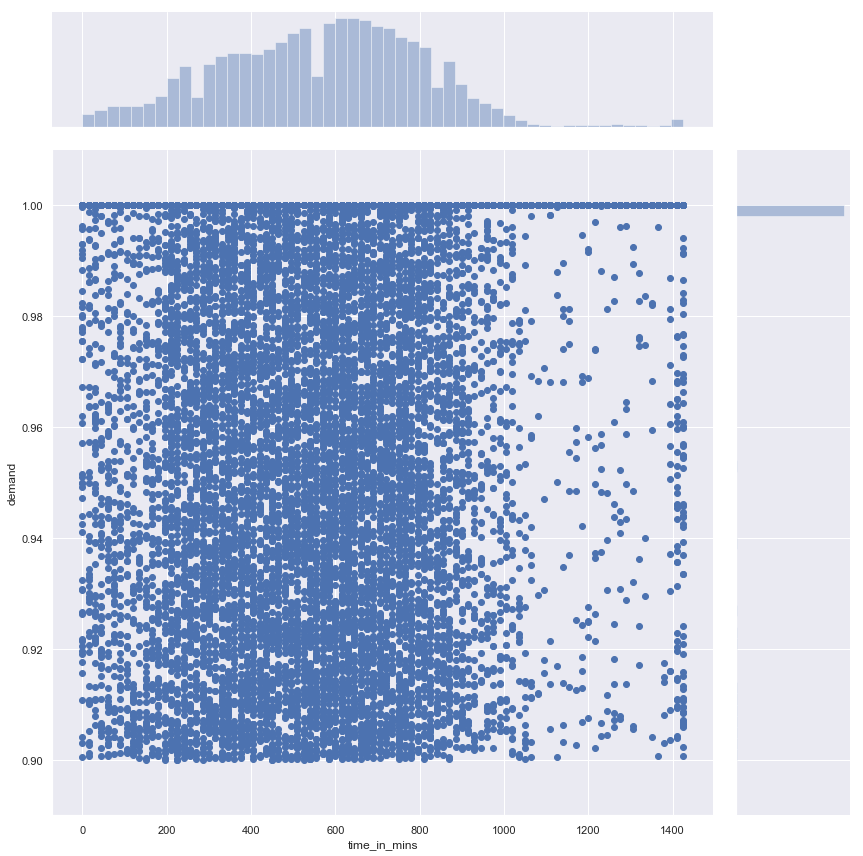

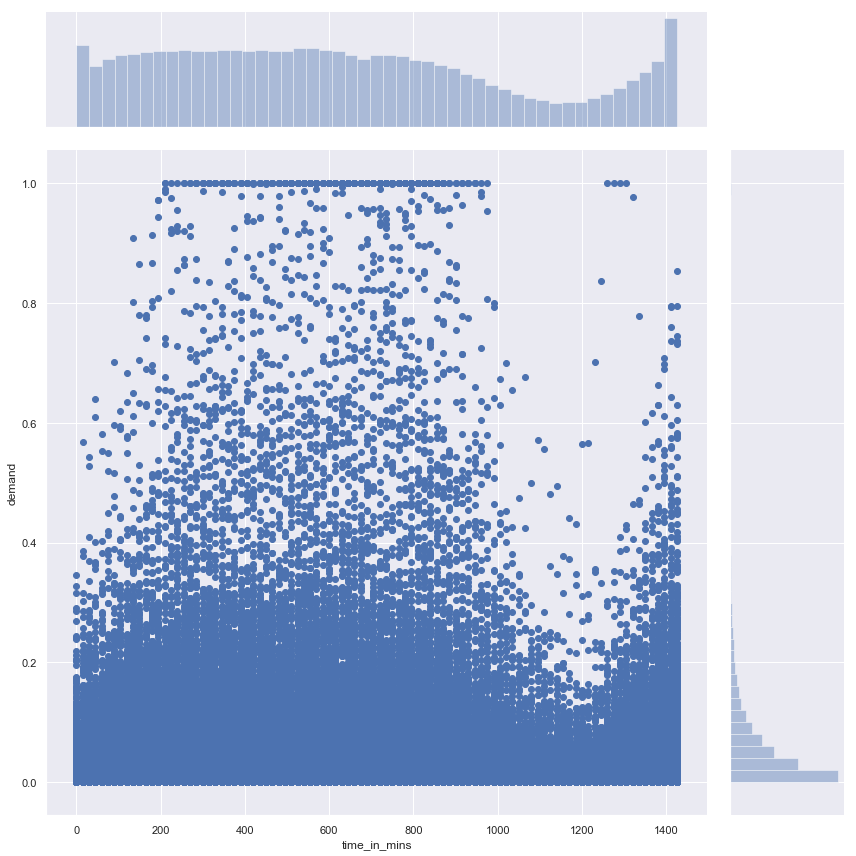

In [6]:
sb.jointplot(data_10["time_in_mins"], data_10["demand"], height = 12)
sb.jointplot(day_20["time_in_mins"], day_20["demand"], height = 12)

Histogram of the demand against the time of the day, on Day 20.

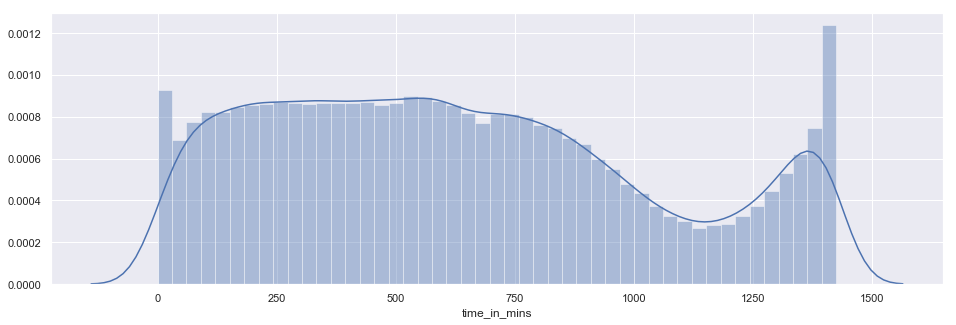

In [7]:
f, axes = plt.subplots(figsize=(16, 5))
sb.distplot(day_20["time_in_mins"])

### Analysis of a specific location on Day 20 - Geohash: qp09dc (-5.35,	90.8)

The demand data for Geohash qp09dc on Day 20


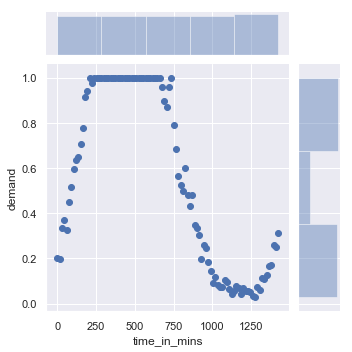

In [8]:
print("The demand data for Geohash qp09dc on Day 20")
day_20_qp09dc = day_20.loc[(day_20['geohash6'] == "qp09dc")]
sb.jointplot(day_20_qp09dc["time_in_mins"], day_20_qp09dc["demand"], height = 5)

In [9]:
new_data = day_20_qp09dc.join(day_20_qp09dc['geohash6'].apply(gh_decode))
new_data = new_data.drop(['geohash6', 'timestamp'], axis = 1)
new_data.head()

,day,demand,hour,time_in_mins,latitude,longitude
408598,20,1.0,7,435,-5.35,90.8
2735816,20,1.0,7,420,-5.35,90.8
2769889,20,1.0,7,450,-5.35,90.8
3048664,20,1.0,6,375,-5.35,90.8
2448915,20,1.0,6,405,-5.35,90.8


## Use of Machine Learning

### Applications of Random Forrest Regressor Method to predict demand

In [10]:
X1 = new_data.drop(["demand"], axis = 1)
y1 = new_data.demand

Splitting of dataset between training and testing sets.

In [11]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25)

In [12]:
RFR_model = RandomForestRegressor(n_estimators = 100, criterion = "mae", n_jobs = -1)
RFR_model.fit(X1_train, y1_train)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

MAE, MSE, RMSE of the model.

In [13]:
predicted_train_set_RFR = RFR_model.predict(X1_train)
print("Mean Absolute Error     :", mean_absolute_error(y1_train, predicted_train_set_RFR))
print("Mean Squared Error      :", mean_squared_error(y1_train, predicted_train_set_RFR))
print("Root Mean Squared Error :", math.sqrt(mean_squared_error(y1_train, predicted_train_set_RFR)))

Mean Absolute Error     : 0.009965402065560318
Mean Squared Error      : 0.0002338439822864944
Root Mean Squared Error : 0.015291958091967634


Put the test sets into the function.

In [14]:
y_test_predictions_RFR = RFR_model.predict(X1_test)
test_set_predictions_RFR = {'time_in_mins': X1_test['time_in_mins'], 'demand': y_test_predictions_RFR}
predicted_dataframe_RFR = pd.DataFrame(data = test_set_predictions_RFR)
predicted_dataframe_RFR = predicted_dataframe_RFR[['time_in_mins','demand']]
predicted_dataframe_RFR.head()

,time_in_mins,demand
1993719,1185,0.072177
3116133,840,0.482580
692232,660,0.952610
2543194,945,0.236558
1432602,1005,0.170869


In [15]:
actual_test_set = X1_test.join(y1_test)
actual_test_set.head()

,day,hour,time_in_mins,latitude,longitude,demand
1993719,20,19,1185,-5.35,90.8,0.042490
3116133,20,14,840,-5.35,90.8,0.479153
692232,20,11,660,-5.35,90.8,1.000000
2543194,20,15,945,-5.35,90.8,0.257888
1432602,20,16,1005,-5.35,90.8,0.093511


The difference in demand values from the actual test set and predicted test set.

In [16]:
subtract = pd.DataFrame(predicted_dataframe_RFR['demand'].sub(actual_test_set['demand'], axis = 0))
difference = subtract.reset_index().drop(columns = 'index')
difference.head()

,demand
0,0.029688
1,0.003426
2,-0.047390
3,-0.021331
4,0.077358


MAE, MSE, RMSE of the actual and predicted test sets.

In [17]:
print("Mean Absolute Error     :", mean_absolute_error(actual_test_set['demand'], predicted_dataframe_RFR['demand']))
print("Mean Squared Error      :", mean_squared_error(actual_test_set['demand'], predicted_dataframe_RFR['demand']))
print("Root Mean Squared Error :", math.sqrt(mean_squared_error(actual_test_set['demand'], predicted_dataframe_RFR['demand'])))

Mean Absolute Error     : 0.03140191280859419
Mean Squared Error      : 0.0020721386315596464
Root Mean Squared Error : 0.045520749461752566


Scatter plots showing the comparison of the actual test set demand and predicted test set demand.

Red denotes the actual test set while green denotes the predicted test set.


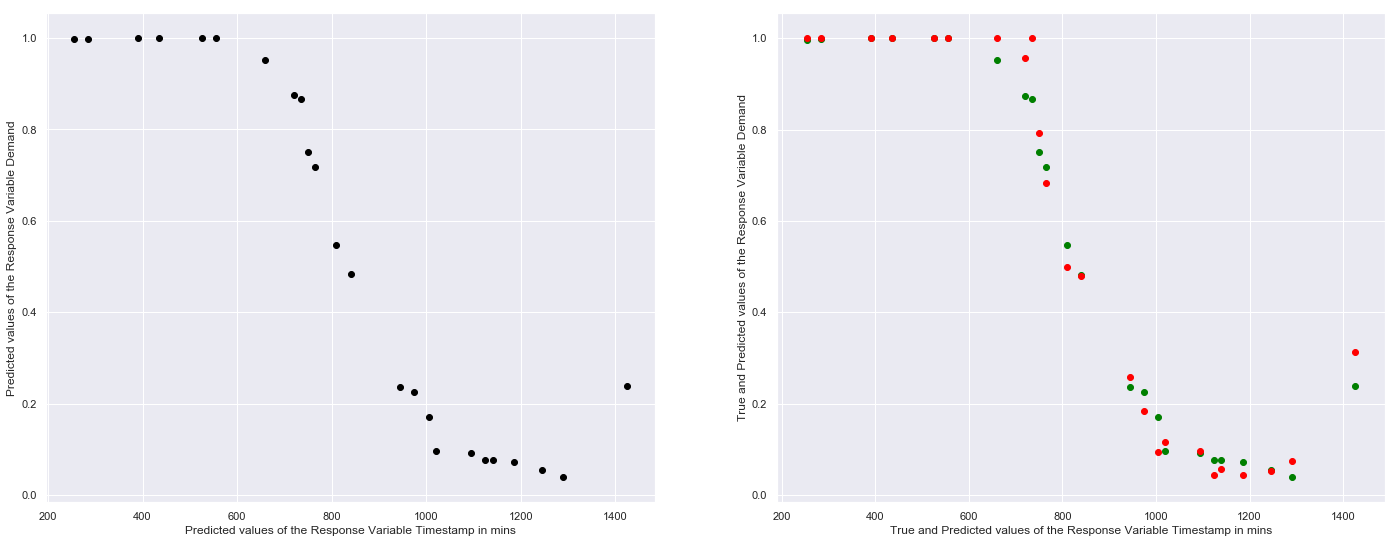

In [18]:
print("Red denotes the actual test set while green denotes the predicted test set.")

f, axes = plt.subplots(1, 2, figsize=(24, 9))
axes[0].scatter(predicted_dataframe_RFR['time_in_mins'], predicted_dataframe_RFR['demand'], color = "black")
axes[0].set_xlabel("Predicted values of the Response Variable Timestamp in mins")
axes[0].set_ylabel("Predicted values of the Response Variable Demand")
axes[1].scatter(predicted_dataframe_RFR['time_in_mins'], predicted_dataframe_RFR['demand'], color = "green")
axes[1].scatter(actual_test_set['time_in_mins'], actual_test_set['demand'], color = "red")
axes[1].set_xlabel("True and Predicted values of the Response Variable Timestamp in mins")
axes[1].set_ylabel("True and Predicted values of the Response Variable Demand")
plt.show()

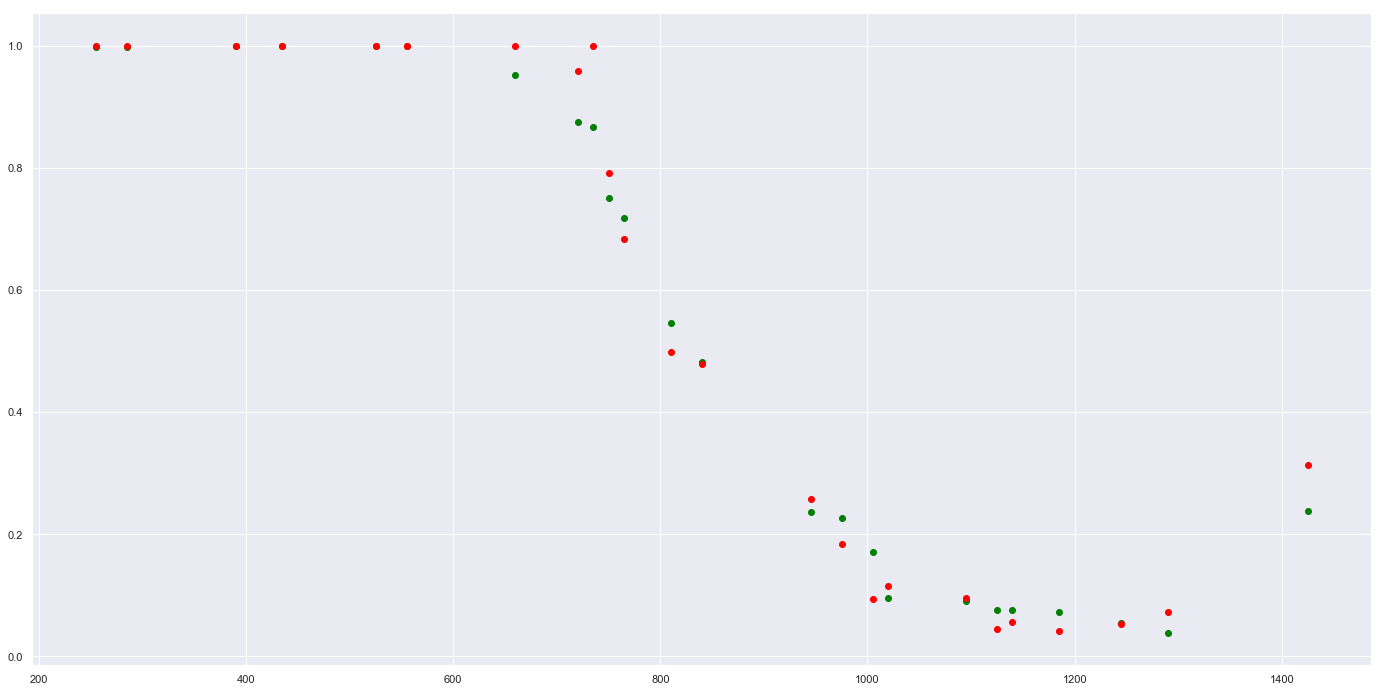

In [19]:
f, axes = plt.subplots(figsize=(24, 12))
plt.scatter(predicted_dataframe_RFR['time_in_mins'], predicted_dataframe_RFR['demand'], color = "green")
plt.scatter(actual_test_set['time_in_mins'], actual_test_set['demand'], color = "red")
plt.show()

### Trying out the model on another location - Geohash: qp03wf (-5.35, 90.7)

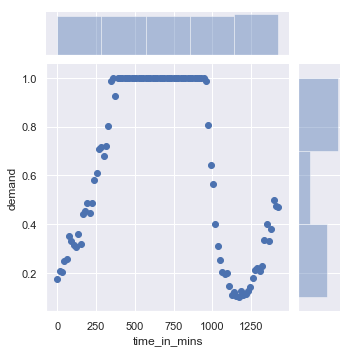

In [20]:
day_20_qp03wf = day_20.loc[(day_20['geohash6'] == "qp03wf")]
sb.jointplot(day_20_qp03wf["time_in_mins"], day_20_qp03wf["demand"], height = 5)

In [21]:
qp03wf_data = day_20_qp03wf.join(day_20_qp03wf['geohash6'].apply(gh_decode))
qp03wf_data = qp03wf_data.drop(['geohash6', 'timestamp'], axis = 1)

A = qp03wf_data.drop(["demand"], axis = 1)
B = qp03wf_data.demand

A_train, A_test, B_train, B_test = train_test_split(A, B, test_size = 0.25)

In [22]:
B_predicted_test = RandomForestRegressor_Model(A_train, B_train, A_test)
B_predicted_test.head()

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False) 

Mean Absolute Error     : 0.010704051295307946
Mean Squared Error      : 0.00036432953447334377
Root Mean Squared Error : 0.019087418224404885


,time_in_mins,demand
2863070,360,0.973192
3570824,690,1.000000
670099,705,1.000000
3529708,105,0.323594
2552021,885,1.000000


In [23]:
actual_qp03wf_test_set = A_test.join(B_test)
actual_qp03wf_test_set.head()

,day,hour,time_in_mins,latitude,longitude,demand
2863070,20,6,360,-5.35,90.7,1.000000
3570824,20,11,690,-5.35,90.7,1.000000
670099,20,11,705,-5.35,90.7,1.000000
3529708,20,1,105,-5.35,90.7,0.313001
2552021,20,14,885,-5.35,90.7,1.000000


In [24]:
print("Mean Absolute Error     :", mean_absolute_error(actual_qp03wf_test_set['demand'], B_predicted_test['demand']))
print("Mean Squared Error      :", mean_squared_error(actual_qp03wf_test_set['demand'], B_predicted_test['demand']))
print("Root Mean Squared Error :", math.sqrt(mean_squared_error(actual_qp03wf_test_set['demand'],
                                                                B_predicted_test['demand'])))

Mean Absolute Error     : 0.01958577551730881
Mean Squared Error      : 0.0009762740298870825
Root Mean Squared Error : 0.031245384137294302


In [25]:
subtract_qp03wf = pd.DataFrame(B_predicted_test['demand'].sub(actual_qp03wf_test_set['demand'], axis = 0))
difference_qp03wf = subtract_qp03wf.reset_index().drop(columns = 'index')
difference_qp03wf.head()

,demand
0,-0.026808
1,0.000000
2,0.000000
3,0.010593
4,0.000000


Red denotes the actual test set while green denotes the predicted test set.


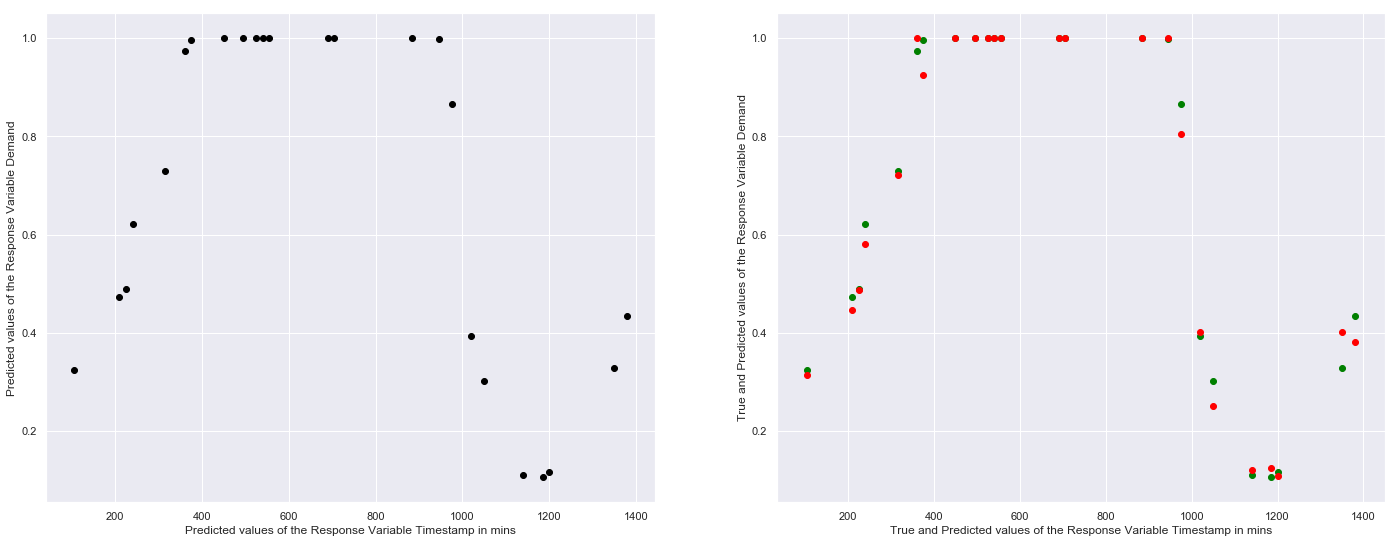

In [26]:
print("Red denotes the actual test set while green denotes the predicted test set.")

f, axes = plt.subplots(1, 2, figsize=(24, 9))
axes[0].scatter(B_predicted_test['time_in_mins'], B_predicted_test['demand'], color = "black")
axes[0].set_xlabel("Predicted values of the Response Variable Timestamp in mins")
axes[0].set_ylabel("Predicted values of the Response Variable Demand")
axes[1].scatter(B_predicted_test['time_in_mins'], B_predicted_test['demand'], color = "green")
axes[1].scatter(actual_qp03wf_test_set['time_in_mins'], actual_qp03wf_test_set['demand'], color = "red")
axes[1].set_xlabel("True and Predicted values of the Response Variable Timestamp in mins")
axes[1].set_ylabel("True and Predicted values of the Response Variable Demand")
plt.show()

### Trying out the model on another location - Geohash: qp03m8

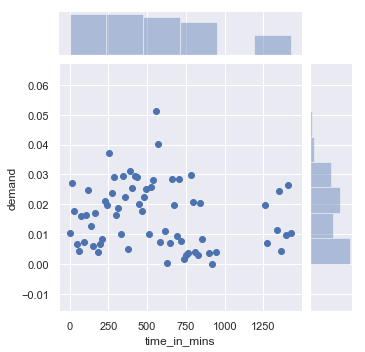

In [27]:
day_20_qp03m8 = day_20.loc[(day_20['geohash6'] == "qp03m8")]
sb.jointplot(day_20_qp03m8["time_in_mins"], day_20_qp03m8["demand"], height = 5)

In [28]:
qp03m8_data = day_20_qp03m8.join(day_20_qp03m8['geohash6'].apply(gh_decode))
qp03m8_data = qp03m8_data.drop(['geohash6', 'timestamp'], axis = 1)

x3 = qp03m8_data.drop(["demand"], axis = 1)
y3 = qp03m8_data.demand

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.25)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False) 

Mean Absolute Error     : 0.010489609753268127
Mean Squared Error      : 0.00015965348786427336
Root Mean Squared Error : 0.012635406121857476 

Red denotes the Actual Test set while Green denotes the Predicted Test set.


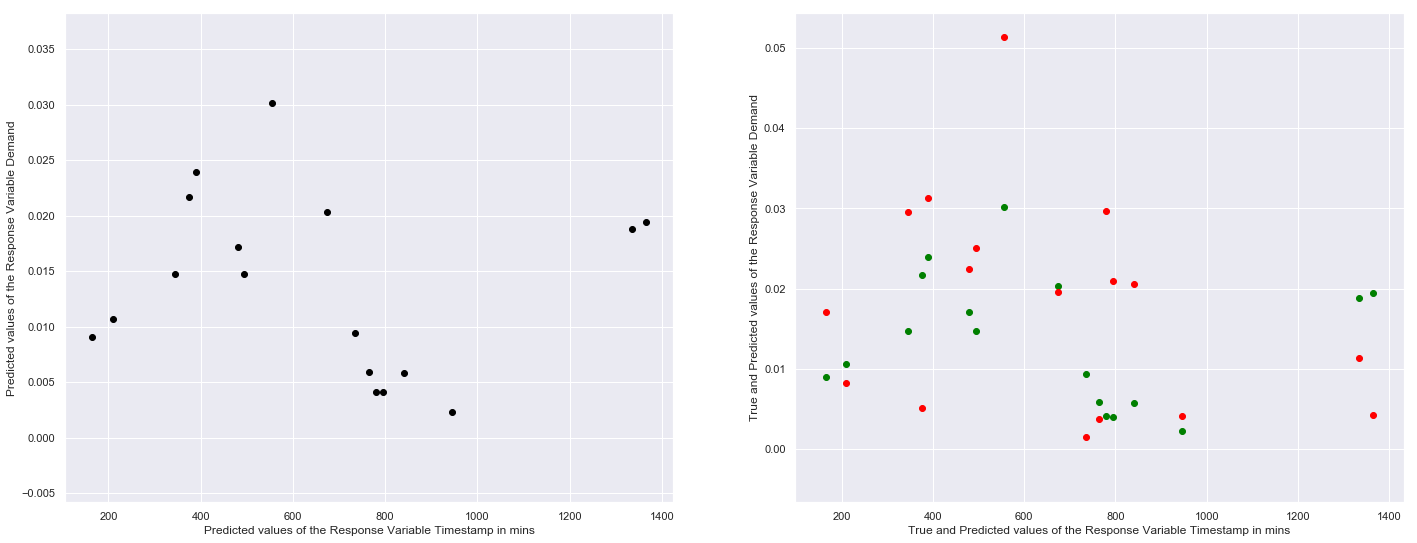

,time_in_mins,demand
3339567,795,0.004062
162640,495,0.014714
380042,1365,0.019462
495161,780,0.004110
159925,555,0.030111
3876174,1335,0.018791
1566545,165,0.009025
3247617,375,0.021657
4085410,210,0.010661
2242859,480,0.017145


In [29]:
RandomForestRegressor_Model_complete(x3_train, x3_test, y3_train, y3_test)

<br><br><br><br><br>

### Applications of Decision Tree Regressor Method to predict demand

In [30]:
DTR_Model = DecisionTreeRegressor(max_depth = 5)
DTR_Model.fit(X1_train, y1_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

MAE, MSE, RMSE of the model.

In [31]:
preds_train_set_DTR = DTR_Model.predict(X1_train)
print("Mean Absolute Error     :", mean_absolute_error(y1_train, preds_train_set_DTR))
print("Mean Squared Error      :", mean_squared_error(y1_train, preds_train_set_DTR))
print("Root Mean Squared Error :", math.sqrt(mean_squared_error(y1_train, preds_train_set_DTR)))

Mean Absolute Error     : 0.009616752003381782
Mean Squared Error      : 0.00025793838415367316
Root Mean Squared Error : 0.016060460272161355


Put the test sets into the function.

In [32]:
y_test_predictions_DTR = DTR_Model.predict(X1_test)
test_set_predictions_DTR = {'time_in_mins': X1_test['time_in_mins'], 'demand': y_test_predictions_DTR}
predicted_dataframe_DTR = pd.DataFrame(data = test_set_predictions_DTR)
predicted_dataframe_DTR = predicted_dataframe_DTR[['time_in_mins','demand']]
predicted_dataframe_DTR.head()

,time_in_mins,demand
1993719,1185,0.065491
3116133,840,0.434143
692232,660,0.992219
2543194,945,0.222316
1432602,1005,0.145078


In [33]:
print("Mean Absolute Error     :", mean_absolute_error(actual_test_set['demand'], predicted_dataframe_DTR['demand']))
print("Mean Squared Error      :", mean_squared_error(actual_test_set['demand'], predicted_dataframe_DTR['demand']))
print("Root Mean Squared Error :", math.sqrt(mean_squared_error(actual_test_set['demand'],
                                                                predicted_dataframe_DTR['demand'])))

Mean Absolute Error     : 0.03963426609555127
Mean Squared Error      : 0.0035369235986470377
Root Mean Squared Error : 0.05947204047825363


The difference in demand values from the actual test set and predicted test set.

In [34]:
subtract2 = pd.DataFrame(predicted_dataframe_DTR['demand'].sub(actual_test_set['demand'], axis = 0))
difference2 = subtract2.reset_index().drop(columns = 'index')
difference2.head()

,demand
0,0.023002
1,-0.045010
2,-0.007781
3,-0.035572
4,0.051567


MAE, MSE, RMSE of the test sets.

In [35]:
print("Mean Absolute Error     :", mean_absolute_error(actual_test_set['demand'], predicted_dataframe_DTR['demand']))
print("Mean Squared Error      :", mean_squared_error(actual_test_set['demand'], predicted_dataframe_DTR['demand']))
print("Root Mean Squared Error :", math.sqrt(mean_squared_error(actual_test_set['demand'], predicted_dataframe_DTR['demand'])))

Mean Absolute Error     : 0.03963426609555127
Mean Squared Error      : 0.0035369235986470377
Root Mean Squared Error : 0.05947204047825363


Scatter plots showing the comparison of the actual test set demand and predicted test set demand.

Red denotes the actual test set while green denotes the predicted test set.


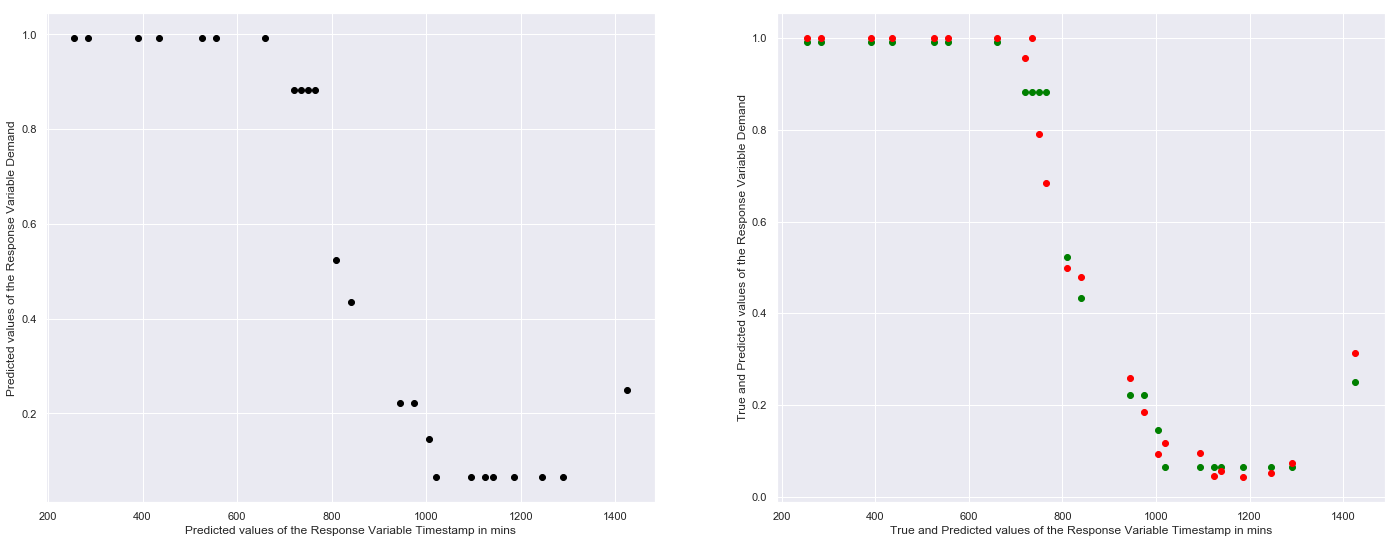

In [36]:
print("Red denotes the actual test set while green denotes the predicted test set.")

f, axes = plt.subplots(1, 2, figsize=(24, 9))
axes[0].scatter(predicted_dataframe_DTR['time_in_mins'], predicted_dataframe_DTR['demand'], color = "black")
axes[0].set_xlabel("Predicted values of the Response Variable Timestamp in mins")
axes[0].set_ylabel("Predicted values of the Response Variable Demand")
axes[1].scatter(predicted_dataframe_DTR['time_in_mins'], predicted_dataframe_DTR['demand'], color = "green")
axes[1].scatter(actual_test_set['time_in_mins'], actual_test_set['demand'], color = "red")
axes[1].set_xlabel("True and Predicted values of the Response Variable Timestamp in mins")
axes[1].set_ylabel("True and Predicted values of the Response Variable Demand")
plt.show()

### Trying out the model on another location - Geohash: qp03y3 (-5.31, 90.6)

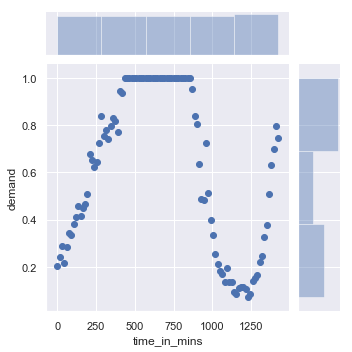

In [37]:
day_20_qp03xx = day_20.loc[(day_20['geohash6'] == "qp03xx")]
sb.jointplot(day_20_qp03xx["time_in_mins"], day_20_qp03xx["demand"], height = 5)

In [38]:
qp03xx_data = day_20_qp03xx.join(day_20_qp03xx['geohash6'].apply(gh_decode))
qp03xx_data = qp03xx_data.drop(['geohash6', 'timestamp'], axis = 1)

x2 = qp03xx_data.drop(["demand"], axis = 1)
y2 = qp03xx_data.demand

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.25)

In [39]:
qp03xx_predicted_test = DecisionTreeRegressor_Model(x2_train, y2_train, x2_test)
qp03xx_predicted_test.head()

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') 

Mean Absolute Error     : 0.009966770969211164
Mean Squared Error      : 0.0002839448510606653
Root Mean Squared Error : 0.016850663223169148


,time_in_mins,demand
3265138,1125,0.102732
392396,555,0.998173
1655449,1050,0.207468
1972273,1305,0.102732
3700317,360,0.781120


In [40]:
DTR_test2 = x2_test.join(y2_test)

subtract3 = pd.DataFrame(qp03xx_predicted_test['demand'].sub(DTR_test2['demand'], axis = 0))
difference3 = subtract3.reset_index().drop(columns = 'index')

print("Mean Absolute Error     :", mean_absolute_error(DTR_test2['demand'], qp03xx_predicted_test['demand']))
print("Mean Squared Error      :", mean_squared_error(DTR_test2['demand'], qp03xx_predicted_test['demand']))
print("Root Mean Squared Error :", math.sqrt(mean_squared_error(DTR_test2['demand'],
                                                                qp03xx_predicted_test['demand'])))

Mean Absolute Error     : 0.06651959535019869
Mean Squared Error      : 0.009951606890353069
Root Mean Squared Error : 0.09975774100466123


Red denotes the actual test set while green denotes the predicted test set.


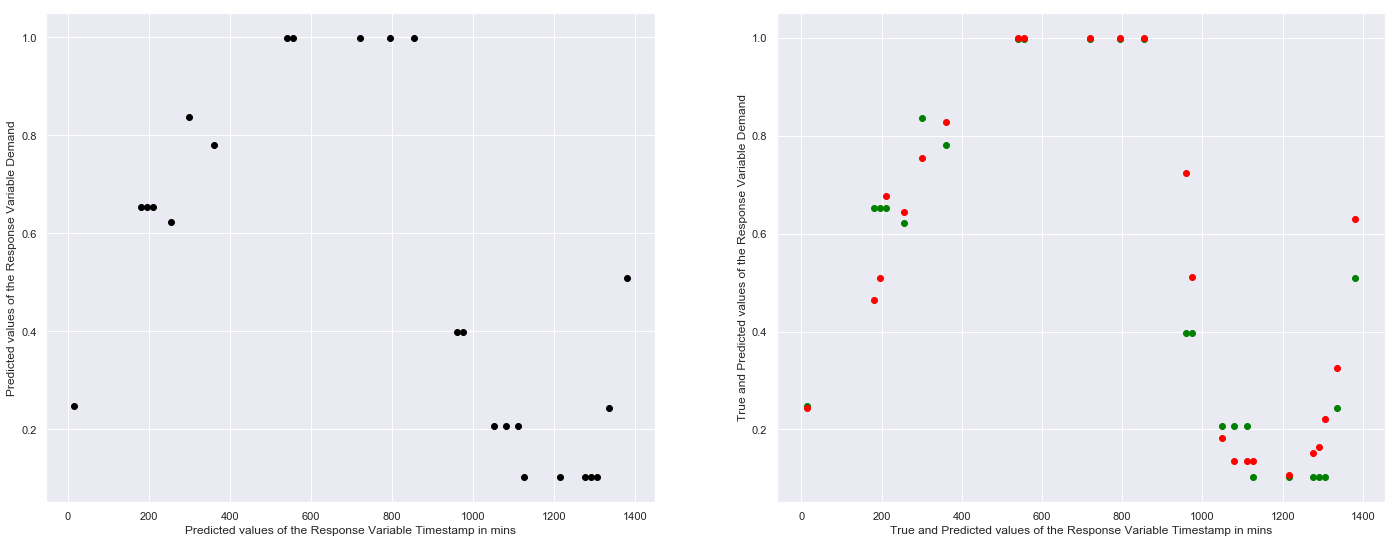

In [41]:
print("Red denotes the actual test set while green denotes the predicted test set.")

f, axes = plt.subplots(1, 2, figsize=(24, 9))
axes[0].scatter(qp03xx_predicted_test['time_in_mins'], qp03xx_predicted_test['demand'], color = "black")
axes[0].set_xlabel("Predicted values of the Response Variable Timestamp in mins")
axes[0].set_ylabel("Predicted values of the Response Variable Demand")
axes[1].scatter(qp03xx_predicted_test['time_in_mins'], qp03xx_predicted_test['demand'], color = "green")
axes[1].scatter(DTR_test2['time_in_mins'], DTR_test2['demand'], color = "red")
axes[1].set_xlabel("True and Predicted values of the Response Variable Timestamp in mins")
axes[1].set_ylabel("True and Predicted values of the Response Variable Demand")
plt.show()

### Trying out the model on another location - Geohash: qp02zw

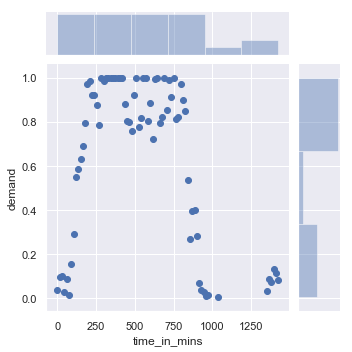

In [42]:
day_20_qp02zw = day_20.loc[(day_20['geohash6'] == "qp02zw")]
sb.jointplot(day_20_qp02zw["time_in_mins"], day_20_qp02zw["demand"], height = 5)

In [43]:
qp02zw_data = day_20_qp02zw.join(day_20_qp02zw['geohash6'].apply(gh_decode))
qp02zw_data = qp02zw_data.drop(['geohash6', 'timestamp'], axis = 1)

x4 = qp02zw_data.drop(["demand"], axis = 1)
y4 = qp02zw_data.demand

x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size = 0.25)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') 

Mean Absolute Error     : 0.08228559067837192
Mean Squared Error      : 0.010056767855599655
Root Mean Squared Error : 0.1002834375936508 

Red denotes the Actual Test set while Green denotes the Predicted Test set.


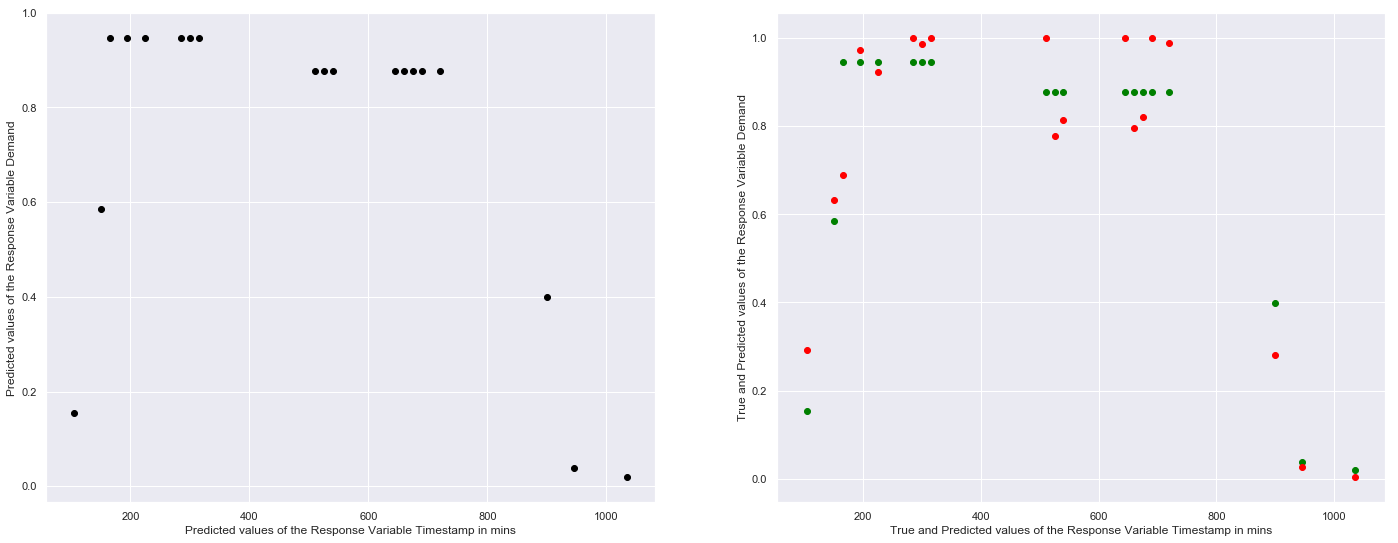

,time_in_mins,demand
2813164,645,0.877914
932548,525,0.877914
3683605,1035,0.019291
2567528,105,0.154092
97033,660,0.877914
2535803,315,0.946273
1203481,300,0.946273
2849313,690,0.877914
2191118,285,0.946273
15304,540,0.877914


In [44]:
DecisionTreeRegressor_Model_complete(x4_train, x4_test, y4_train, y4_test)